# 2. Exploratory Data Analysis - Song Attributes

In [27]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import re

# bs4, nltk, and sklearn imports
from bs4 import BeautifulSoup   
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#pd.set_option("display.max_rows", None, "display.max_columns", None)

# Ordered Songlist

In [28]:
ordered_songlist = pd.read_csv('ordered_songlist.csv')

In [29]:
ordered_songlist.head()

,index,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity,lyrics
0,0,24kGoldn,Mood (feat. Iann Dior),Mood (feat. Iann Dior),3tjFYV6RSFtuktYl3ZtYcq,0.700,0.722,7,-3.558,0,0.0369,0.000000,0.2720,0.756,90.989,140526,4,0.221,100.0,kgoldn kgoldn always mood fuckin round actin b...
1,1,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.746,0.690,11,-7.956,1,0.1640,0.000000,0.1010,0.497,89.977,181733,4,0.247,96.0,dababy woo woo pull pull pull baby pull pull p...
2,2,Justin Bieber,Holy,Holy (feat. Chance The Rapper),5u1n1kITHCxxp8twBcZxWy,0.673,0.704,6,-8.056,1,0.3600,0.000000,0.0898,0.372,86.919,212093,4,0.196,93.0,justin bieber hear lot sinners saint might riv...
3,3,Ariana Grande,Stuck with U,Stuck with U (with Justin Bieber),4HBZA5flZLE435QTztThqH,0.597,0.450,8,-6.658,1,0.0418,0.000000,0.3820,0.537,178.765,228482,3,0.223,90.0,ariana grande mmm hey fun stuck ariana grande ...
4,4,Pop Smoke,Shoot For The Stars Aim For The Moon,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,0.709,0.548,10,-8.493,1,0.3530,0.000002,0.1330,0.543,83.995,160000,4,0.650,88.0,uh shawty jogging every morning every morning ...


# Ordered Large DF

In [30]:
#Data gathered partially from the dataset on https://www.kaggle.com/huanntran100/spotify-song-popularity-prediction

In [31]:
ordered_large_df = pd.read_csv('ordered_large_df.csv')

# Concatenating Small DF and Large DF into Giant Ordered DF

In [6]:
giant_ordered_df = pd.concat([ordered_songlist, ordered_large_df])

In [7]:
giant_ordered_df.head()

,Unnamed: 0,index,artist,track_name,popularity,danceability,energy,loudness,mode,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,acousticness,lyrics,genre,track_id,key
0,0,0,24kGoldn,Mood (feat. Iann Dior),100.0,0.700,0.722,-3.558,0,0.0369,...,0.2720,0.756,90.989,140526,4,0.221,kgoldn kgoldn always mood fuckin round actin b...,NaN,NaN,NaN
1,1,1,DaBaby,ROCKSTAR (feat. Roddy Ricch),96.0,0.746,0.690,-7.956,1,0.1640,...,0.1010,0.497,89.977,181733,4,0.247,dababy woo woo pull pull pull baby pull pull p...,NaN,NaN,NaN
2,2,2,Justin Bieber,Holy (feat. Chance The Rapper),92.0,0.673,0.704,-8.056,1,0.3600,...,0.0898,0.372,86.919,212093,4,0.196,justin bieber hear lot sinners saint might riv...,NaN,NaN,NaN
3,3,3,Ariana Grande,Stuck with U (with Justin Bieber),91.0,0.597,0.450,-6.658,1,0.0418,...,0.3820,0.537,178.765,228482,3,0.223,ariana grande mmm hey fun stuck ariana grande ...,NaN,NaN,NaN
4,4,4,salem ilese,Mad at Disney,88.0,0.738,0.621,-7.313,1,0.0486,...,0.6920,0.715,113.968,136839,4,0.424,mad disney disney tricked tricked wishing shoo...,NaN,NaN,NaN


In [8]:
giant_ordered_df.drop(columns=['key','index','Unnamed: 0','genre','track_id'], inplace = True)

In [9]:
giant_ordered_df.head()

,artist,track_name,popularity,danceability,energy,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,lyrics
0,24kGoldn,Mood (feat. Iann Dior),100.0,0.700,0.722,-3.558,0,0.0369,0.000000,0.2720,0.756,90.989,140526,4,0.221,kgoldn kgoldn always mood fuckin round actin b...
1,DaBaby,ROCKSTAR (feat. Roddy Ricch),96.0,0.746,0.690,-7.956,1,0.1640,0.000000,0.1010,0.497,89.977,181733,4,0.247,dababy woo woo pull pull pull baby pull pull p...
2,Justin Bieber,Holy (feat. Chance The Rapper),92.0,0.673,0.704,-8.056,1,0.3600,0.000000,0.0898,0.372,86.919,212093,4,0.196,justin bieber hear lot sinners saint might riv...
3,Ariana Grande,Stuck with U (with Justin Bieber),91.0,0.597,0.450,-6.658,1,0.0418,0.000000,0.3820,0.537,178.765,228482,3,0.223,ariana grande mmm hey fun stuck ariana grande ...
4,salem ilese,Mad at Disney,88.0,0.738,0.621,-7.313,1,0.0486,0.000007,0.6920,0.715,113.968,136839,4,0.424,mad disney disney tricked tricked wishing shoo...


# Exporting Giant Ordered DF

In [10]:
giant_ordered_df.to_csv('giant_ordered_df.csv')

# Exploratory Visual Data Analysis

In [11]:
song_features = ['danceability','energy','loudness','speechiness',
                 'instrumentalness', 'liveness', 'valence', 'tempo',
                'mode','duration_ms','time_signature','acousticness']

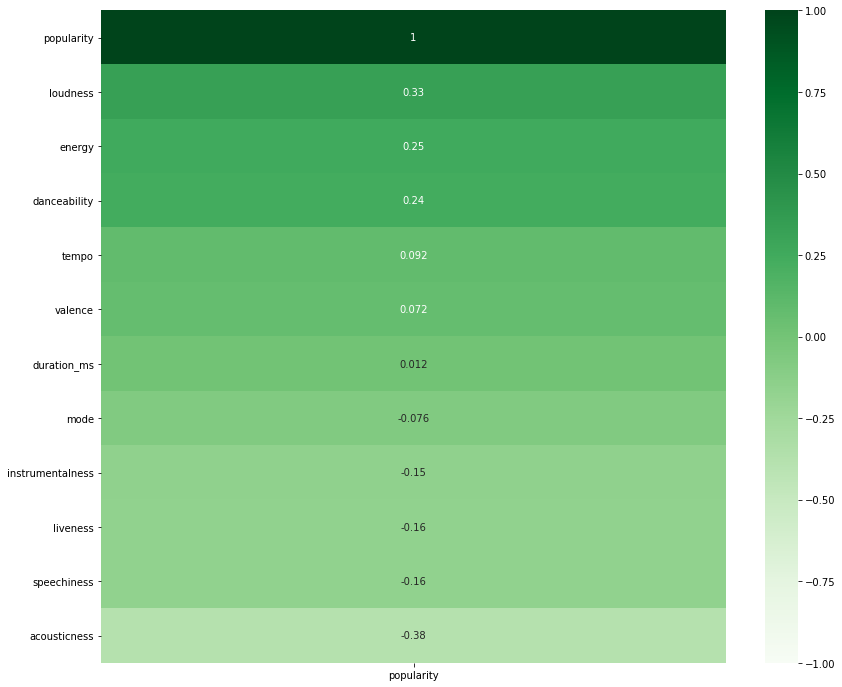

In [25]:
# Heatmap of all features correlation with "popularity"
corr_pop = giant_ordered_df.corr()[['popularity']]
plt.figure(figsize=(14,12))
sns.heatmap(corr_pop.sort_values('popularity',ascending=False), cmap="Greens", center=0, annot=True, vmin=-1, vmax=1);

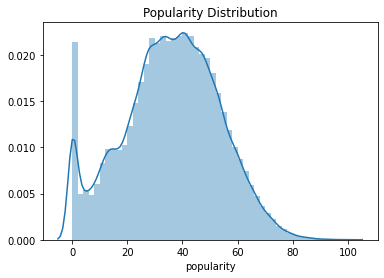

In [13]:
sns.distplot(giant_ordered_df['popularity']).set_title('Popularity Distribution');

Text(0.5, 1.0, 'Popularity Based on Time Signature')

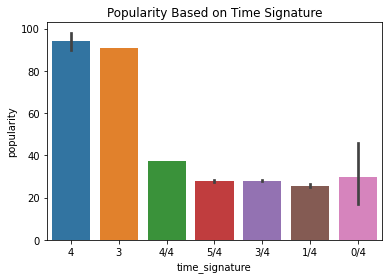

In [14]:
sns.barplot(x = 'time_signature', y = 'popularity', data = giant_ordered_df);
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Mode')

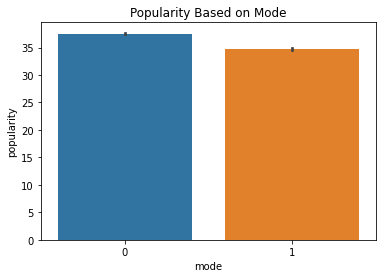

In [15]:
sns.barplot(x = 'mode', y = 'popularity', data = giant_ordered_df);
plt.title('Popularity Based on Mode')

In [1]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = giant_ordered_df,color='yellow');

NameError: name 'sns' is not defined

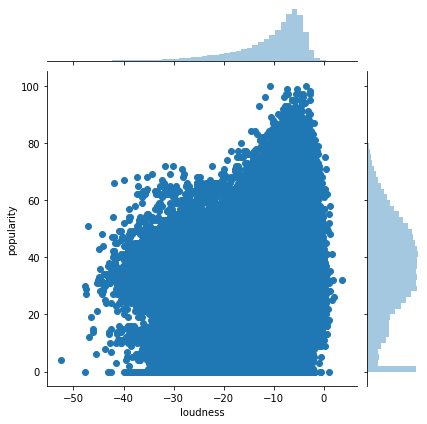

In [17]:
sns.jointplot(x = 'loudness', y = 'popularity', data = giant_ordered_df);

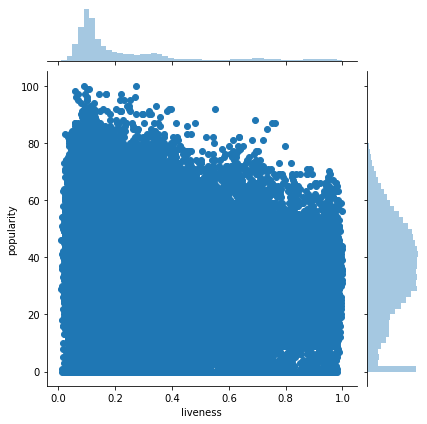

In [18]:
sns.jointplot(x = 'liveness', y = 'popularity', data = giant_ordered_df);

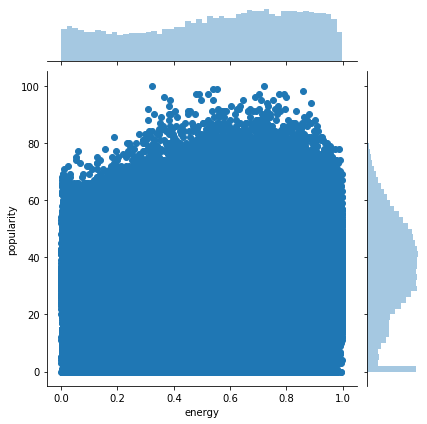

In [19]:
sns.jointplot(x = 'energy', y = 'popularity', data = giant_ordered_df);

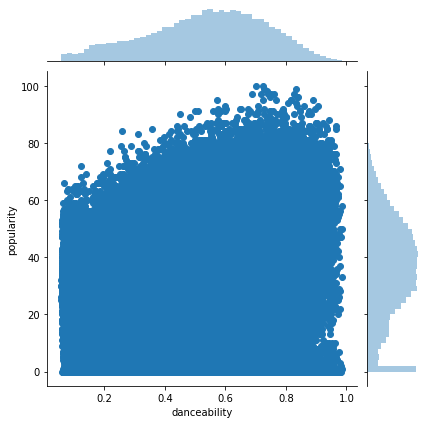

In [20]:
sns.jointplot(x = 'danceability', y = 'popularity', data = giant_ordered_df);

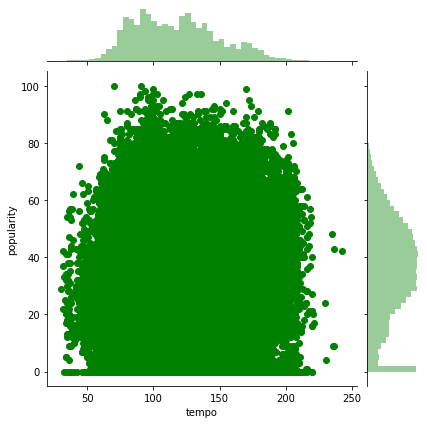

In [26]:
sns.jointplot(x = 'tempo', y = 'popularity', data = giant_ordered_df,color='Green');

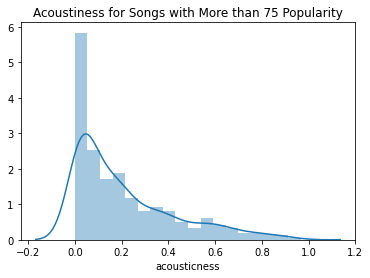

In [22]:
popular_above_75 = giant_ordered_df[giant_ordered_df.popularity > 75]
sns.distplot(popular_above_75['acousticness'])
plt.title('Acoustiness for Songs with More than 75 Popularity');

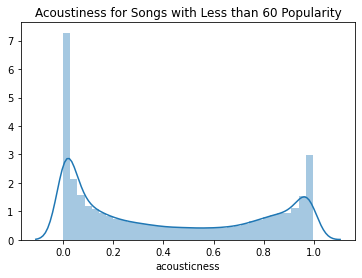

In [23]:
popular_below_75 = giant_ordered_df[giant_ordered_df.popularity < 75]
sns.distplot(popular_below_75['acousticness'])
plt.title('Acoustiness for Songs with Less than 60 Popularity');

### Go to Part 3. Song Lyric EDA for more!